<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/Blob_to_bounding_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np

# Set the dimensions of the array
height, width, channels = 100, 100, 1

# Create an empty array filled with zeros
array = np.zeros((height, width, channels), dtype=int)

# Generate random clusters of ones
num_clusters = 10  # Number of clusters

for _ in range(num_clusters):
    # Generate random coordinates for the cluster
    cluster_size = np.random.randint(3, 16)
    x = np.random.randint(0, width - cluster_size)
    y = np.random.randint(0, height - cluster_size)
    
    # Set the cluster region to ones
    array[y:y+cluster_size, x:x+cluster_size, :] = 1


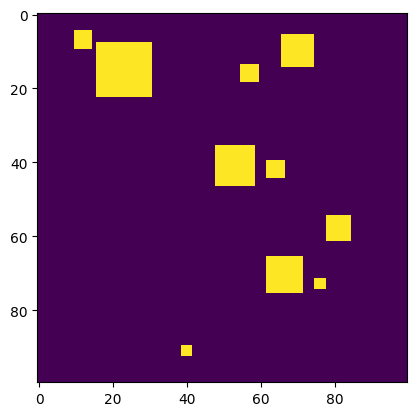

In [17]:
import matplotlib.pyplot as plt

plt.imshow(array)

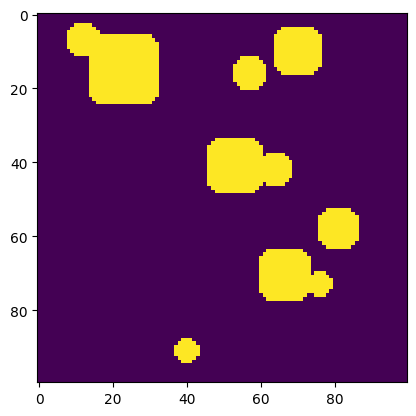

In [25]:
import numpy as np
from scipy.ndimage import binary_dilation

def expand_islands(matrix, n):
    # Create a structuring element for dilation
    structure = np.ones((3, 3), dtype=int)

    # Perform binary dilation on the matrix
    dilated_matrix = binary_dilation(matrix, iterations=n)

    return dilated_matrix

# Assuming you have a matrix called 'matrix' with islands of ones
expanded_matrix = expand_islands(array, n=2)
plt.imshow(expanded_matrix)

[  0. 406. 157.  69. 277. 109. 218.  37.]


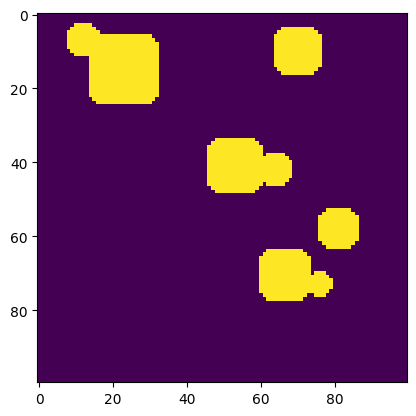

In [30]:
from scipy.ndimage import label, sum

def remove_small_islands(matrix, n):
    labeled_matrix, num_features = label(matrix)  # Label connected components
    component_sizes = sum(matrix, labeled_matrix, range(num_features + 1))  # Calculate sizes

    # Create a mask to filter out small islands
    print(component_sizes)
    mask = (component_sizes >= n)

    # Apply the mask to remove small islands
    filtered_matrix = mask[labeled_matrix]

    return filtered_matrix

# Assuming you have a matrix called 'matrix' with islands of ones
filtered_matrix = remove_small_islands(expanded_matrix, n=100)
plt.imshow(filtered_matrix)

21.366995073891626 13.832512315270936
Island 1:
70.0 10.0
Island 2:
55.61371841155235 41.231046931407946
Island 3:
81.0 58.0
Island 4:
68.0229357798165 70.88990825688073
Island 5:


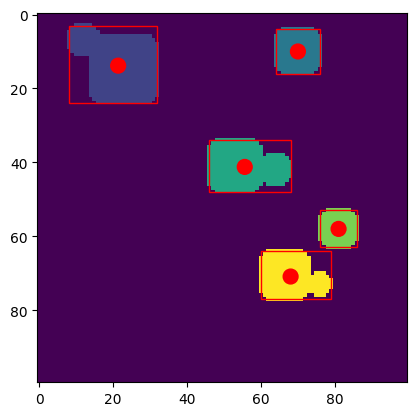

In [36]:
import numpy as np
from scipy.ndimage import label

def find_islands(matrix):

  # Apply the label function to find connected components
  labeled_matrix, num_labels = label(matrix)

  # Get the unique labels
  unique_labels = np.unique(labeled_matrix)

  # Assuming you have a matrix image 'image' and a list of points 'points'
  # Display the matrix image
  plt.imshow(labeled_matrix)

  # Set the plot aspect ratio to equal
  plt.gca().set_aspect('equal')

  # Iterate over the unique labels (excluding background label 0)
  for label_value in unique_labels[1:]:
      # Create a mask for the current label
      mask = (labeled_matrix == label_value)
      
      # Find the indices of the ones in the mask
      indices = np.where(mask)

      avg_y = indices[0].mean()
      avg_x = indices[1].mean()

      min_x = indices[1].min()
      max_x = indices[1].max()

      min_y = indices[0].min()
      max_y = indices[0].max()

      x, y = avg_x, avg_y
      circle = plt.Circle((x, y), radius=2, color='red', fill=True)

      rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y,
                         linewidth=1, edgecolor='r', facecolor='none')
      plt.gca().add_patch(circle)
      plt.gca().add_patch(rect)

      print(avg_x, avg_y)
      # Print the coordinates of the island
      print(f"Island {label_value}:")
      # for y, x in zip(indices[0], indices[1]):
      #     print(f"({x}, {y})")
      # print()
  plt.show()

find_islands(filtered_matrix)